<a href="https://colab.research.google.com/github/Frknslmn50/ENNCA_23L/blob/master/cifar10_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CIFAR10 Dataset Convolutional Neural Network and Tranformers Practice**

In [75]:
import torch
import torchvision
import torchvision.transforms as transforms

In [76]:
# I modified the transformers.
transform = transforms.Compose(
    [transforms.RandomRotation(degrees=15),
     transforms.RandomHorizontalFlip(),
     transforms.ColorJitter(),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [77]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

In [78]:
import torch.nn as nn
import torch.nn.functional as F
# I changed the network to make it deeper with 5 conv layers.
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3 , stride=1 , padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3 , stride=1 , padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3 , stride=1 , padding=1)
        self.conv4 = nn.Conv2d(64, 128, 3 , stride=1 , padding=1)
        self.conv5 = nn.Conv2d(128, 256, 3 , stride=1 , padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 4 * 4, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = self.pool(F.relu(self.conv4(x)))
        x = F.relu(self.conv5(x))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net()

In [79]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [80]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.303
[1,  4000] loss: 2.243
[1,  6000] loss: 1.971
[1,  8000] loss: 1.798
[1, 10000] loss: 1.689
[1, 12000] loss: 1.595
[2,  2000] loss: 1.519
[2,  4000] loss: 1.468
[2,  6000] loss: 1.422
[2,  8000] loss: 1.369
[2, 10000] loss: 1.327
[2, 12000] loss: 1.277
Finished Training


In [86]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [87]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

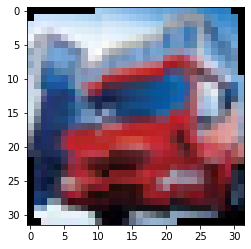

Ground truth :  truck


In [88]:
images , ground_truths = next(dataiter)
image = images[0]
ground_truth = ground_truths[0]
imshow(image)
print("Ground truth : ",classes[ground_truth])
#image = torchvision.transforms.functional.to_pil_image(image)
torchvision.utils.save_image(image, 'image.png')

In [89]:
image = torch.unsqueeze(image,0)

In [90]:
output = net(image)
_, predicted = torch.max(output, 1)
print("Prediction of neural network is ",classes[predicted])

Prediction of neural network is  car
